In [1]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [4]:
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
m = ExtraTreesClassifier()
m.fit(x,y)

ExtraTreesClassifier()

In [5]:
ft_impt = pd.Series(m.feature_importances_,x.columns)
print(ft_impt.nlargest(9))

Glucose                     0.226297
Age                         0.143490
BMI                         0.142519
DiabetesPedigreeFunction    0.118721
Pregnancies                 0.112957
BloodPressure               0.101748
SkinThickness               0.080433
Insulin                     0.073835
dtype: float64


<Axes: >

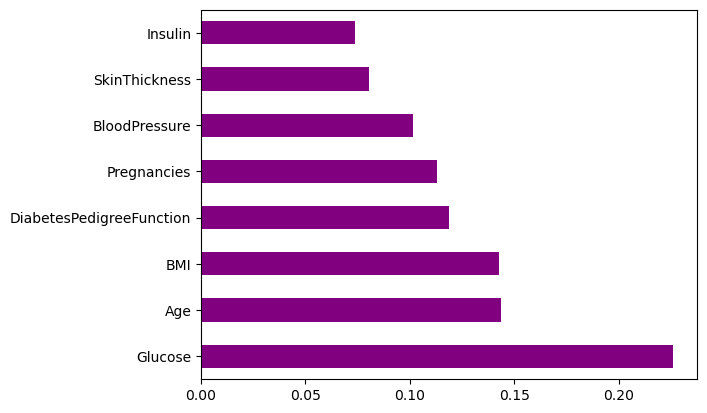

In [6]:
ft_impt.nlargest(9).plot(kind='barh',color = 'Purple')

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
stdsclr = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
x_train_std = stdsclr.fit_transform(x_train)
x_test_std = stdsclr.fit_transform(x_test)

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
nn_mlp = MLPClassifier(hidden_layer_sizes=(7,3,5),solver='lbfgs',random_state=1)
nn_mlp.fit(x_train_std,y_train)

MLPClassifier(hidden_layer_sizes=(7, 3, 5), random_state=1, solver='lbfgs')

In [11]:
nn_mlp.score(x_test_std,y_test)

0.7402597402597403